<a href="https://colab.research.google.com/github/BioGeek/hackathon_indaba_senegal_2024/blob/main/Snake_Venom_sequencing_Indaba_Practical_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Snake venom sequencing tutorial 🔬

<!-- Image courtesy of David Goodsell, see https://ccsb.scripps.edu/goodsell/ for more gorgeous illustrations! -->

<a href="https://colab.research.google.com/github/deep-learning-indaba/indaba-pracs-2023/blob/main/practicals/ML_for_Bio_Indaba_Practical_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

© Deep Learning Indaba 2024. Apache License 2.0.


**Aims/Learning Objectives:**

1. Learn the basics of proteins (e.g. what is a protein, what is it made of?) 🧪
2. Very Gentle introduction to the Snake Hackathon Dataset

**Prerequisites:**

1. Basic ML knowledge and Python
2. Basic Bio is beneficial

For this practical, you will need to use a GPU to speed up training. To do this, go to the "Runtime" menu in Colab, select "Change runtime type" and then in the popup menu, choose "GPU" in the "Hardware accelerator" box.


In [ ]:
## Install and import anything required. Capture hides the output from the cell.
# @title Install and import required packages. (Run Cell)
%%capture
!pip install -qU py3Dmol
!pip install transformers datasets

import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# import tensorflow as tf
# import optax
# import tensorflow_datasets as tfds

In [ ]:
# @title Check TPU/GPU. (Run Cell)
num_devices = torch.cuda.device_count()
device_type = torch.cuda.get_device_name(0) if num_devices > 0 else "CPU"

print(f"Found {num_devices} CUDA devices of type {device_type}.")

Found 1 CUDA devices of type Tesla T4.


# 1. **The Wonderous World of Biology**






Why did the snake get into machine learning?

Because it heard optimize its "python" code in biology and make it "scale"!


In this tutorial, we will start with a gentle intro to proteins based on the great tutorial on [ML for Biology from DLI 2023](https://github.com/deep-learning-indaba/indaba-pracs-2023/blob/main/practicals/ML_for_Bio_Indaba_Practical_2023.ipynb) to finally understand how scientists manage to sequence snake venoms using mass spectrometry.


## 1.1 What is a Protein?

Proteins are **large**, **complex molecules** that play many critical roles in the body. They are required for the structure, function, and regulation of the body's tissues and organs.

Proteins are molecules in 3D space, but they are made up of linear elements called **amino acids** or **residues**. For example, take the protein **insulin**, which is a relatively small protein of only 110 amino acids that is important for facilitating sugar uptake from the bloodstream into cells. It is formed of 2 separate chains of amino acids (shown in red and blue below) that are bound together.


Each amino acid has its own physical structure and properties – for example, some amino acids are positively charged while others are negatively charged. These biophysical properties have repurcussions for the overall protein structure and functon.

Here is a list of the 20 amino acid building components that make up proteins:

<!-- ![](https://upload.wikimedia.org/wikipedia/commons/4/4e/Proteinogenic_Amino_Acid_Table.png) -->

![](https://i0.wp.com/www.compoundchem.com/wp-content/uploads/2014/09/20-Common-Amino-Acids-v3.png?ssl=1)

🥜 **In a nutshell**:
- Proteins are made up of **sequences of amino acids**, each of which have their own unique properities which influences the 3D shape.

## 1.2 Why are Proteins Important?



Proteins do most of their work in the cell and perform crucial functions in the body. They transport molecules from one place to another, form the structure of our cells, communicate signals within the cell and between cells, speed up chemical reactions, control cell growth and differentiation, and defend against foreign invaders.

These varying roles are a result of the diverse structures of proteins. Even a slight change in structure can render a protein nonfunctional.

## 1.3 Protein Structures






In general, proteins have four forms:

<img src="https://comis.med.uvm.edu/VIC/coursefiles/MD540/MD540-Protein_Organization_10400_574581210/Protein-org/structure.jpg"/>

1. **Primary structure**: sequence of amino acids that make up the protein, like **letters in a sentence**. For example, the sequence "AUGC" represents a protein made up of residues `A`, `U`, `G` and `C` in the same way that "HELLO" represents a word made up of letters `H`, `E`, `L` and `O`.


2. **Secondary structure**: local interactions between nearby residues cause specific sub-structures to form. Two common secondary structures are α-helices (coiled like a spring) and β-sheets (folded like an accordion).

<img src="https://www.creative-proteomics.com/pronalyse/images/1-4-1-Secondary-Structure-Analysis_Fig1.jpg"/>


3. **Tertiary structure**: the full, three-dimensional shape of a single protein chain. This structure is the result of distant amino acids interacting and folding together.

4. **Quaternary**: proteins made up of multiple polypeptide chains, or subunits, coming together like pieces of a puzzle. These subunits can be identical or different.


**Group Task:**

Execute the cell below which visualise a protein structure of a **three finger toxin from snake Hemachatus venom**
Snake venoms are rich sources of biologically active proteins and polypeptides. Three-finger toxins are non-enzymatic proteins present in elapid (cobras, kraits, mambas and sea snakes) and colubrid venoms.

In [ ]:
import py3Dmol
import requests

def fetch_pdb(pdb_id):
    url = f'https://files.rcsb.org/download/{pdb_id}.pdb'
    response = requests.get(url)
    return response.text

pdb = fetch_pdb("3VTS")

pdbview = py3Dmol.view()
pdbview.addModel(pdb, "pdb")
pdbview.setStyle({"cartoon": {"color": "spectrum"}})
pdbview.setBackgroundColor("white")
pdbview.zoomTo()
pdbview.zoom(2, 800)
pdbview.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## 1.4 Machine Learning and Proteins

In the realm of machine learning, proteins present an interesting challenge. The wide range of structures and functions of proteins offers a vast playground for prediction tasks. Proteins can be represented in various ways (e.g., sequences, structures) which can be used to train machine learning models for tasks such as:

* **Protein Classification**: Classifying proteins into their respective families
 based on their amino acid sequences.

* **Protein Structure Prediction**: Predicting the 3D structure of a protein from its amino acid sequence (e.g. AlphaFold 2).

* **Protein Function Prediction**: Predicting the function of a protein based on its sequence or structure.

* **Protein-Protein Interaction Prediction**: Predicting how proteins will interact with each other.

🥜 **In a nutshell**:
- Proteins are super important for tons of different things in the body. We can use machine learning to learn more about them!
- Proteins are made up of many building blocks which together form complex structures.
- Proteins are dynamic and constantly shifting around in the body.

# 2. **Representation of Proteins**

A protein structure has a sequence associated. For example the following is the toxin sequence associated to the previous structure.


In [ ]:
toxin_sequence = (
    'LKCHNKLVPFLSKTCPEGKNLCYKMTLMKMPKIPIKRGCTDACPKSSLLVKVVCCNKDKCN'
)

In [ ]:
print(f'The length of the protein is {len(toxin_sequence)}.')

The length of the protein is 61.


Now we have a **sequence representation** of a protein. But since machine learning deals with numerical data, how can we represent this sequence in a numerical form?

## 2.1 One-hot encoding of a protein sequence.

The simplest way to represent a protein sequence is using a **one-hot encoding**. Here is how it works:
- Since there are 21 possible amino acids, each amino acid must be one of these 21 options.
- We can therefore represent each amino acid as a binary vector that is all zeroes except for a single "1" in the position corresponding to that amino acid.

As a concrete example, imaginine we want to one-hot encode a small protein with just 5 amino acids, MALWN.

First, let's define the mapping between an amino acid letter code to an integer index:

In [ ]:
amino_acids = [
    'R', 'H','K', 'D', 'E',
    'S', 'T', 'N', 'Q', 'G',
    'P', 'C', 'U', 'A', 'V',
    'I', 'L', 'M', 'F', 'Y',
    'W']

amino_acid_to_index = {
    amino_acid: index for index, amino_acid in enumerate(amino_acids)
    }

amino_acid_to_index

{'R': 0,
 'H': 1,
 'K': 2,
 'D': 3,
 'E': 4,
 'S': 5,
 'T': 6,
 'N': 7,
 'Q': 8,
 'G': 9,
 'P': 10,
 'C': 11,
 'U': 12,
 'A': 13,
 'V': 14,
 'I': 15,
 'L': 16,
 'M': 17,
 'F': 18,
 'Y': 19,
 'W': 20}

Now, given a specific protein sequence, or a small part of it that we call peptide o Kmer, we can convert it to a sequence of integers:

In [ ]:
Toxin_Kmer = toxin_sequence[3:11]

Toxin_Kmer_indices = [
    amino_acid_to_index[amino_acid] for amino_acid in Toxin_Kmer]

Toxin_Kmer_indices

[1, 7, 2, 16, 14, 10, 18, 16]

In code, this is how we can get this embedding:

In [ ]:
# Convert indices list to a tensor
indices_tensor = torch.tensor(Toxin_Kmer_indices)

# Perform one-hot encoding
one_hot_encoded_sequence = torch.nn.functional.one_hot(indices_tensor, num_classes=len(amino_acids))

# Print the one-hot encoded sequence
print(one_hot_encoded_sequence)

tensor([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])


So the encoding for the first amino acid "M" is:

In [ ]:
one_hot_encoded_sequence[0]

tensor([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

We can visualise the one-hot encoded matrix representing our tiny protein sequence "MALWN":

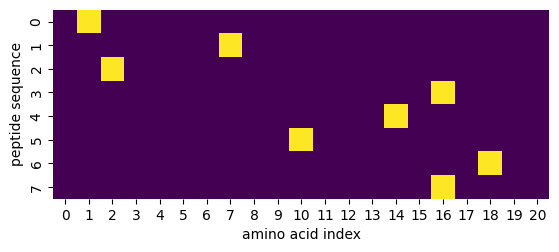

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = sns.heatmap(
    one_hot_encoded_sequence, square=True, cbar=False, cmap='viridis')
fig.set(xlabel='amino acid index', ylabel='peptide sequence')
plt.show()

Having this basic numerical representation of a protein sequence allows us to interact with proteins mathematically. Although a good starting point, at the moment this representation is too basic to be useful. Let's now examine **dense learned embeddings of amino acids**.

## 2.2 Learned embeddings of amino acids

Thoughout the rest of the practical, we will use a popular pre-trained transformer protein language model called **ESM** from Meta. We will discuss more about how the model works in a minute, but first, let's explore its representation of amino acids.

 The model is hosted on the Hugging Face 🤗 platform. In case you are not already familiar with Hugging Face, it is a really fantastic resource of thousands of pre-trained models that you can quickly load and get started with. To access the ESM2 protein language model, we first will use the transformers library (ESM2 is a transformer-based model). Lets import the required module and load up the ESM2 tokenizer and model:

In [ ]:
from IPython.display import clear_output
from transformers import AutoTokenizer, EsmModel, EsmConfig

model_checkpoint = "facebook/esm2_t30_150M_UR50D"  # From: https://github.com/facebookresearch/esm#available-models-and-datasets-
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = EsmModel.from_pretrained(model_checkpoint)
clear_output()

We can examine the mapping between tokens and indices that the ESM2 tokenizer uses:

In [ ]:
vocab_to_index = tokenizer.get_vocab()
vocab_to_index

{'<cls>': 0,
 '<pad>': 1,
 '<eos>': 2,
 '<unk>': 3,
 'L': 4,
 'A': 5,
 'G': 6,
 'V': 7,
 'S': 8,
 'E': 9,
 'R': 10,
 'T': 11,
 'I': 12,
 'D': 13,
 'P': 14,
 'K': 15,
 'Q': 16,
 'N': 17,
 'F': 18,
 'Y': 19,
 'M': 20,
 'H': 21,
 'W': 22,
 'C': 23,
 'X': 24,
 'B': 25,
 'U': 26,
 'Z': 27,
 'O': 28,
 '.': 29,
 '-': 30,
 '<null_1>': 31,
 '<mask>': 32}

You can see it's quite similar to the amino acid to integer mapping we made manually, but contains some additional tokens that are useful such as a token for an unknown amino acid (`unk`) and a token designating the end of the string (`eos` for 'end of sentence').

Let's use the tokenizer to encode our tiny protein sequence:

In [ ]:
tokenized_Toxin_Kmer = tokenizer(Toxin_Kmer)['input_ids']
tokenized_Toxin_Kmer

[0, 21, 17, 15, 4, 7, 14, 18, 4, 2]

We could choose to chop off the initial `cls` and final `eos` tokens if we wanted to:

In [ ]:
tokenized_Toxin_Kmer[1:-1]

[21, 17, 15, 4, 7, 14, 18, 4]

Let's extract the embeddings for each amino acid:

In [ ]:
token_embeddings = model.get_input_embeddings().weight.detach().numpy()
token_embeddings.shape

(33, 640)

You can see that for each of the 33 possible input tokens, we have a 640-dimensional embedding vector.

Although it's a bit (!) tricky to visualise in 640 dimensions, we can use a dimensionality reduction technique such as tSNE to map this information down to 2 dimensions and plot where each token lies in this new 2 dimensional space:

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate='auto', init='random',
            random_state=123, perplexity=3)
embeddings_tsne = tsne.fit_transform(token_embeddings)
embeddings_tsne_df = pd.DataFrame(
    embeddings_tsne, columns=['first_dim', 'second_dim'])
embeddings_tsne_df.shape

(33, 2)

Let's plot a scatter plot:

<Axes: xlabel='first_dim', ylabel='second_dim'>

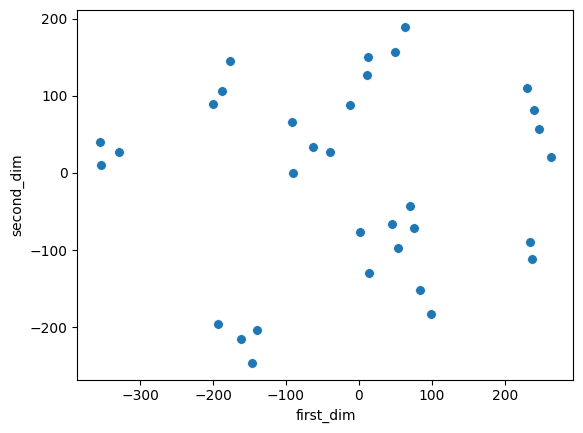

In [ ]:
sns.scatterplot(data=embeddings_tsne_df,
                x='first_dim',
                y='second_dim',
                s=50)

To see if similar types of tokens and amino acids cluster together, we can label each token with its label, and replot the plot and colour by label:

In [ ]:
embeddings_tsne_df['token'] = list(vocab_to_index.keys())

token_labels = {
    '<cls>': 'special_token',
    '<pad>': 'special_token',
    '<eos>': 'special_token',
    '<unk>': 'special_token',
    'L': 'hydrophobic',
    'A': 'hydrophobic',
    'G': 'special_amino_acid',
    'V': 'hydrophobic',
    'S': 'polar_uncharged',
    'E': 'negatively_charged',
    'R': 'positively_charged',
    'T': 'polar_uncharged',
    'I': 'hydrophobic',
    'D': 'negatively_charged',
    'P': 'special_amino_acid',
    'K': 'positively_charged',
    'Q': 'polar_uncharged',
    'N': 'polar_uncharged',
    'F': 'hydrophobic',
    'Y': 'hydrophobic',
    'M': 'hydrophobic',
    'H': 'positively_charged',
    'W': 'hydrophobic',
    'C': 'special_amino_acid',
    'X': 'special_amino_acid',
    'B': 'special_amino_acid',
    'U': 'special_amino_acid',
    'Z': 'special_amino_acid',
    'O': 'special_amino_acid',
    '.': 'special_token',
    '-': 'special_token',
    '<null_1>': 'special_token',
    '<mask>': 'special_token'
    }

embeddings_tsne_df['label'] = embeddings_tsne_df['token'].map(token_labels)

embeddings_tsne_df.head(10)

,first_dim,second_dim,token,label
0,84.252831,-151.931641,<cls>,special_token
1,-328.320160,26.773651,<pad>,special_token
2,98.762131,-182.481689,<eos>,special_token
3,-354.844238,39.576466,<unk>,special_token
4,49.348991,156.832977,L,hydrophobic
5,-12.306890,88.708771,A,hydrophobic
6,-90.414093,-0.246226,G,special_amino_acid
7,11.655083,127.006844,V,hydrophobic
8,-62.815372,33.480095,S,polar_uncharged
9,239.446838,81.936119,E,negatively_charged


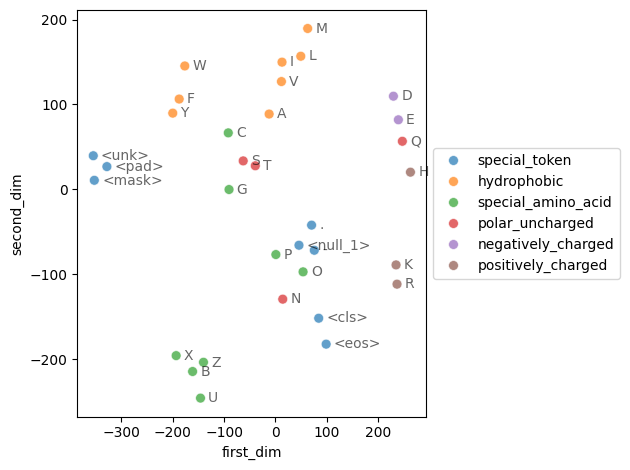

In [ ]:
ax = sns.scatterplot(data=embeddings_tsne_df,
                x='first_dim',
                y='second_dim',
                hue='label',
                s=50, alpha=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

# Add the token name next to its position in the embedding space.
for i, token in enumerate(embeddings_tsne_df['token']):
  plt.annotate(text=token,
               xy=(embeddings_tsne_df['first_dim'][i] + 15,
                   embeddings_tsne_df['second_dim'][i] - 5),
               alpha=0.6)

# 3. Using a protein language model
The output of the ESM model is updated embeddings, with the same dimensions and sequence length as the input, with encoded information about the specific protein and each amino acid.

In [ ]:
output = model(**tokenizer(toxin_sequence, return_tensors='pt'))
print(f'Protein sequence length: {len(toxin_sequence)}')
print(f'Model output shape: {output.last_hidden_state.shape}')

Protein sequence length: 61
Model output shape: torch.Size([1, 63, 640])


The shapes of each dimension and meaning is:
*   `1` - Batch Size
*   `112` - `<cls>` + 61 amino acids + `<eos>`
*   `640` - Embedding size of the model and matches the size of our input embeddings

Notice that the output length will change based on the length of the protein sequence. Often, we want to make predictions about the entire proteins. We can summarize proteins of various lengths by averaging the embeddings along the sequence.

As an example, we can visualize the average embeddings of proteins which either belong inside the cellular fluid (cytosolic) or are stuck in the membrane of the protein.

In [ ]:
cytosolic_sequences = [
 'MSLRKQTPSDFLKQIIGRPVVVKLNSGVDYRGVLACLDGYMNIALEQTEEYVNGQLKNKYGDAFIRGNNVLYISTQKRRM',
 'MAARALCMLGLVLALLSSSSAEEYVGLSANQCAVPAKDRVDCGYPHVTPKECNNRGCCFDSRIPGVPWCFKPLQEAECTF',
 'MNREGAPGKSPEEMYIQQKVRVLLMLRKMGSNLTASEEEFLRTYAGVVNSQLSQLPPHSIDQGAEDVVMAFSRSETEDRRQ',
 'MPLSDWCCGICEEAPLGRAYTQTWMETGCGPHGVTALGQQELKDCLRARSGGTASSVDWIMEAARGSLNVHNCLIKFGRRD',
 'MATFPPATSAPQQPPGPEDEDSSLDESDLYSLAHSYLGGGGRKGRTKREAAANTNRPSPGGHERKLVTKLQNSERKKRGARR',
 'MASSSGAGAAAAAAAANLNAVRETMDVLLEISRILNTGLDMETLSICVRLCEQGINPEALSSVIKELRKATEALKAAENMTS',
 'MAVFHDEVEIEDFQYDEDSETYFYPCPCGDNFSITKEDLENGEDVATCPSCSLIIKVIYDKDQFVCGETVPAPSANKELVKC',
 'MQNDAGEFVDLYVPRKCSASNRIIGAKDHASIQMNVAEVDKVTGRFNGQFKTYAICGAIRRMGESDDSILRLAKADGIVSKNF',
 'MSGPNGDLGMPVEAGAEGEEDGFGEAEYAAINSMLDQINSCLDHLEEKNDHLHARLQELLESNRQTRLEFQQQLGEAPSDASP',
 'MALSVLRLALLLLAVTFAASLIPQFGLFSKYRTPNCSQYRLPGCPRHFNPVCGSDMSTYANECTLCMKIREGGHNIKIIRNGPC']

membrane_sequences = [
 'MGRAMVARLGLGLLLLALLLPTQIYSSETTTGTSSNSSQSTSNSGLAPNPTNATTKAAGGALQSTASLFVVSLSLLHLYS',
 'MATPTQTPTKAPEEPDPFYYDYNTVQTVGMTLATILFLLGILIVISKKVKCRKADSRSESPTCKSCKSELPSSAPGGGGV',
 'MKYPLMPLVNDLTFSFLVFWFCLPVGLLLLLIIWLRFLLSQDSEENDSSVCLDWEPWSKGPAEFCWKGTLHGQEKERPCW',
 'MAYHGLTVPLIVMSVFWGFVGFLVPWFIPKGPNRGVIITMLVTCSVCCYLFWLIAILAQLNPLFGPQLKNETIWYLKYHWP',
 'MDGGQPIPSSLVPLGNESADSSMSLEQKMTFVFVILLFIFLGILIVRCFRILLDPYRSMPTSTWADGLEGLEKGQFDHALA',
 'MSSTYCGNSSAKMSVNEVSAFSLTLEQKTGFAFVGILCIFLGLLIIRCFKILLDPYSSMPSSTWEDEVEEFDKGTFEYALA',
 'MSATWTLSPEPLPPSTGPPVGAGLDAEQRTVFAFVLCLLVVLVLLMVRCVRILLDPYSRMPASSWTDHKEALERGQFDYALV',
 'MAVSTEELEATVQEVLGRLKSHQFFQSTWDTVAFIVFLTFMGTVLLLLLLVVAHCCCCSSPGPRRESPRKERPKGVDNLALEP',
 'MEALGSGHYVGGSIRSMAAAALSGLAVRLSRPQGTRGSYGAFCKTLTRTLLTFFDLAWRLRKNFFYFYILASVILNVHLQVYI',
 'MDLSFMAAQLPMMGGAFMDSPNEDFSTEYSLFNSSANVHAAANGQGQPEDPPRSSNDAVLLWIAIIATLGNIVVVGVVYAFTF']

We'll extract the embeddings for each sequence and then average along the sequence length.

**Group Task:** Write function to compute average embedding over the sequence.

In [ ]:
def sequence_embeddings(sequences, device='cpu'):
  model_inputs = tokenizer(sequences,padding=True, return_tensors='pt')
  model_inputs = {k:v.to(device) for k,v in model_inputs.items()}
  outputs = model(**model_inputs)
  # TODO: Implement averaging. Should convert shape
  # shape (<Batch>, <Sequence Length>, <Embedding>) -> (<Batch>, <Embedding>)


In [ ]:
# @title Answer to code task (Try not to peek until you've given it a good try!')

def sequence_embeddings(sequences, device='cpu'):
  model_inputs = tokenizer(sequences,padding=True, return_tensors='pt')
  model_inputs = {k:v.to(device) for k,v in model_inputs.items()}
  outputs = model(**model_inputs)
  embeddings = outputs.last_hidden_state.detach().cpu().numpy()
  seq_len = model_inputs['attention_mask'].cpu().sum(axis=-1, keepdims=True)
  return np.sum(embeddings, axis=1) / seq_len  # Average along sequence dimension.

###### Now we'll compute this for the sequences.

In [ ]:
cytosolic_embeddings = sequence_embeddings(cytosolic_sequences)
membrane_embeddings = sequence_embeddings(membrane_sequences)
combined_embeddings = np.concatenate([cytosolic_embeddings, membrane_embeddings], axis=0)

In [ ]:
combined_embeddings.shape

(20, 640)

Notice that even though the lengths of the proteins are different, the averaged embeddings are all the same length.

This makes it easy to then feed into downstream classifeirs that require a fixed feature length e.g. Random Forest or a simple Multilayer Perceptron.

In [ ]:
embeddings_tsne = TSNE(n_components=2, learning_rate='auto',
                       init='random', random_state=123, perplexity=3).fit_transform(combined_embeddings)
embeddings_tsne_df = pd.DataFrame(
    embeddings_tsne, columns=['first_dim', 'second_dim'])
embeddings_tsne_df['type'] = ['Cytosolic'] * len(cytosolic_sequences) + ['Membrane'] * len(membrane_sequences)

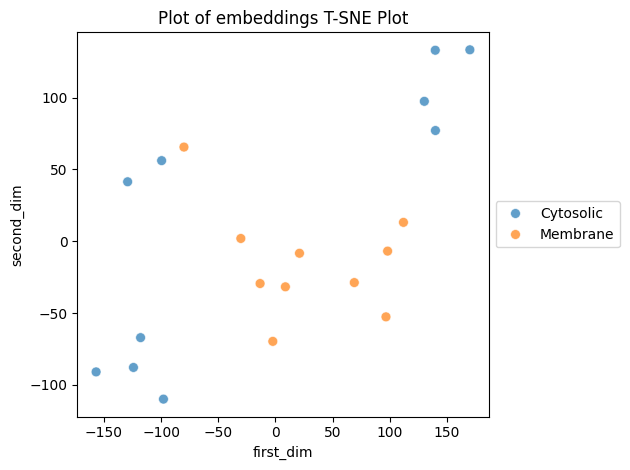

In [ ]:
ax = sns.scatterplot(data=embeddings_tsne_df,
                x='first_dim',
                y='second_dim',
                hue='type',
                s=50, alpha=0.7)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Plot of embeddings T-SNE Plot')
plt.tight_layout()

As you can see, there is some nice clustering of the different protein types. This means that embeddings contain information on where the protein is located with-in the cell.

# 4. Training a model

Last year we used a dataset [to train a simple model using the amino acid embeddings](https://github.com/deep-learning-indaba/indaba-pracs-2023/blob/main/practicals/ML_for_Bio_Indaba_Practical_2023.ipynb) to predict Snake Antivenom Binding.

<!-- !['Paths to Follow'](https://assets.stickpng.com/images/580b57fbd9996e24bc43bce5.png) -->
<img src="https://assets.stickpng.com/images/580b57fbd9996e24bc43bce5.png"  width="60%">



Currently, the only effective treatment against snakebite envenoming consists of unspecified cocktails of polyclonal antibodies. These antivenom antibodies work unreliably across different species of snake, and until recently little data existed on which of the 2000+ snake venom toxins they bind, as well as where the binding of the antibody to the toxin occurs.

To address this issue, a recent study used high-density peptide microarray (HDPM) technology with all currently available African snake toxin protein sequences, together with eight commercial antivenoms in clinical use in Africa to better understand how antivenoms bind to specific snake venom toxins.

We will use the dataset from this study, which measures how cross-reactive the eight snake antivenoms are and where in the toxin sequence the antibodies they bind to the toxin (epitope).

!['Paths to Follow'](https://i.ibb.co/sgtcN4v/ml-for-bio-02-720.png)



The specific dataset we will use originates from the [African Snake Antivenom Binding Challenge](https://zindi.africa/competitions/umojahack-africa-2022-advanced-challenge) hosted on [Zindi](https://zindi.africa/).

This year we will deep dive on how this dataset has been created!
Welcome to the wold of mass spectrometry and peptide sequencing!

## 5.1 Loading the data



Reading in the data with Pandas

In [ ]:
data_df = pd.read_csv("https://storage.googleapis.com/umojahack2022/train.csv")
data_df.head(5)

,ID,Toxin_UniprotID,Kmer_Position_start,Kmer_Position_end,Antivenom,Toxin_Kmer,Signal,Genus,Species,ProteinFam,ProteinSubFam,ProteinSubSubFam
0,P07037_Bioclone_1,P07037,1,16,Bioclone,NLYQFKNMIQCTVPNR,-0.53,Aspidelaps,Aspidelaps_scutatus,Phospholipase_A2,Group_I_subfamily,D49_sub_subfamily
1,P07037_Bioclone_2,P07037,2,17,Bioclone,LYQFKNMIQCTVPNRS,-1.00,Aspidelaps,Aspidelaps_scutatus,Phospholipase_A2,Group_I_subfamily,D49_sub_subfamily
2,P07037_Bioclone_3,P07037,3,18,Bioclone,YQFKNMIQCTVPNRSW,-0.21,Aspidelaps,Aspidelaps_scutatus,Phospholipase_A2,Group_I_subfamily,D49_sub_subfamily
3,P07037_Bioclone_4,P07037,4,19,Bioclone,QFKNMIQCTVPNRSWW,-0.30,Aspidelaps,Aspidelaps_scutatus,Phospholipase_A2,Group_I_subfamily,D49_sub_subfamily
4,P07037_Bioclone_5,P07037,5,20,Bioclone,FKNMIQCTVPNRSWWH,-1.00,Aspidelaps,Aspidelaps_scutatus,Phospholipase_A2,Group_I_subfamily,D49_sub_subfamily


Each row in the dataset represents a k-mer (16 amino acid sequence within the toxin) and it has a signal column coming from the high-density peptide microarray experiment. With this, we will predict signal column generated by a given `Toxin_K_mer` and `Antivenom`.

Note: A K-mer is a subsequence of a full protein consisting of `K` sequential amino acids

# 5. Further Resources

We hope that this practical has got you excited about applying machine learning to biology!

If you'd like to venture a little deeper down this rabbit hole, here are some of the resources we found useful in preparing this practical:
1. [I should have loved biology ](https://jsomers.net/i-should-have-loved-biology/) (Essay by James Somers)
2. [The Most Complex Language in the World](https://www.youtube.com/watch?v=TYPFenJQciw) (Youtube video by Kurzgesagt)
3. [Language models of protein sequences at the scale
of evolution enable accurate structure prediction](https://www.biorxiv.org/content/10.1101/2022.07.20.500902v1.full.pdf) (ESM paper)
4. [Inner Life of a Cell | Protein Packing Animation](https://www.youtube.com/watch?v=uHeTQLNFTgU) (Protein packing animation)

Today we have focussed on proteins, but the field of biology is enormous and there is plently of other areas ripe for research! From drug discovery, modelling genes to studying the brain! Best of luck for your journey ahead 🚀

<img src="https://baobab.deeplearningindaba.com/static/media/indaba-logo-dark.d5a6196d.png" width="50%" />